<a href="https://colab.research.google.com/github/20230212KIM/Data_Analysis/blob/main/10_Regression_withScikitLearn_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn for machine learning

## 🌹🌸🌺 Understanding iris data 🌹🌸🌺
- This dataset contains measurements of various features of iris flowers, including sepal꽃잎 length, sepal width, petal꽃받침 length, and petal width.
- It consists of 150 observations of iris flowers, with 50 observations for each of the three species: <font color = 'purple'> **_🌹setosa, 🌸 versicolor, and 🌺virginica_**</font>.
- The dataset is commonly used for tasks such as classification and clustering.

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
# 🐹 Save the DataFrame of titanic data to an updated excel (.xlxs) format
df.head(150).to_excel("iris_sl_sw_pl_pw_sp_windex.xlsx", index=True)
df.head(150).to_excel("iris_sl_sw_pl_pw_sp_woindex.xlsx", index=False)

In [5]:
# 🐹 Save the DataFrame of titanic data to a csv format
df.head(150).to_csv("iris_sl_sw_pl_pw_sp_windex.csv", index=True)
df.head(150).to_csv("iris_sl_sw_pl_pw_sp_woindex.csv", index=False)

In [6]:
df['species'].unique()
# It returns an array containing unique values such as setosa, versicolor, and virginica from the 'species' column of the DataFrame df.

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
sns.pairplot(df, hue='species')
# In the sns.pairplot() function from the Seaborn library, the hue parameter is used to specify a categorical variable
#that will be used <to color the data points> in the pairplot.
# Seaborn will create separate plots for each unique value in the 'species' column of your DataFrame, and the data points
#in each plot will be colored differently based on their respective species. It is good for visualization.

## <font color = 'orange'> ⬇️ **pyplot module of matplotlib library**

Importing matplotlib.pyplot module provides a MATLAB-like plotting interface in Python for creating a variety of plots and visualizations.

    We can then use the <functions and methods> provided by the pyplot module by prefixing them with plt,
    which is a common alias for matplotlib.pyplot. This alias helps to make the code more concise and readable.

In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'sepal_width')

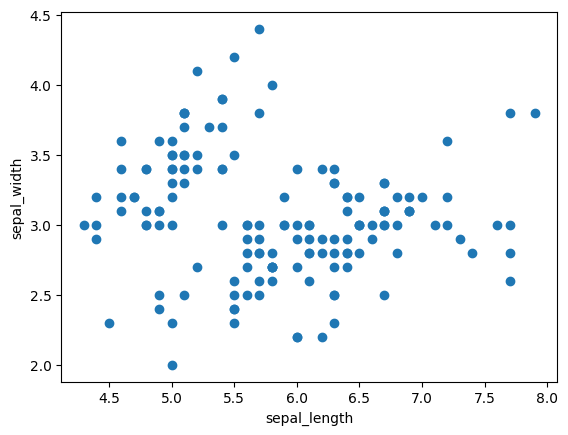

In [10]:
x = list(df['sepal_length'])
y = list(df['sepal_width'])
plt.scatter(x,y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Text(0, 0.5, 'sepal_width')

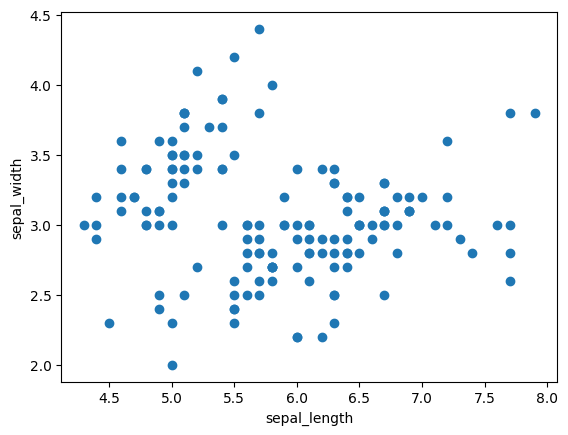

In [ ]:
# The function list(): It selects the 'sepal_length' column from the DataFrame df and converts it into a list named x.
# Each element in the list corresponds to the value of 'sepal_length' for a particular row in the DataFrame.

x = list(df['sepal_length']) # indexer []
y = list(df['sepal_width'])

import matplotlib.pyplot as plt

plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Text(0.5, 1.0, 'setosa')

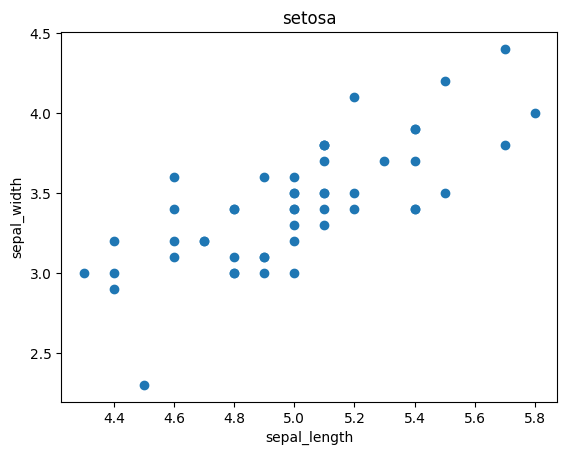

In [12]:
df_setosa=df[df['species']=='setosa']
x=list(df_setosa['sepal_length'])
y=list(df_setoda['sepal_width'])
plt.scatter(x,y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

Text(0.5, 1.0, 'setosa')

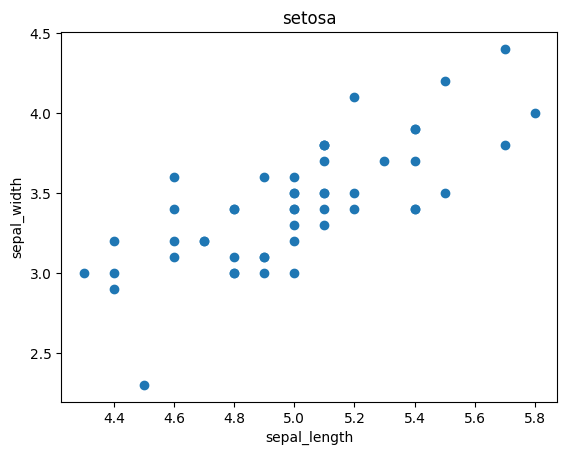

In [ ]:
df_setosa = df[df['species']=='setosa']
#Step 1. df['species']=='setosa': It selects <the rows> in the DataFrame df where <the value in the 'species' column is equal to 'setosa'>.
#Step 2. df[df['species']=='setosa']: This expression uses the previous Step #1 to filter the DataFrame df to create a new DataFrame df_setosa,
# containing only the rows where the value in the 'species' column is 'setosa'.

x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')

## 📈 **Supervised learning: regression (linear regression)**

In [14]:
!pip install Scikit-learn
from sklearn.linear_model import LinearRegression

In [13]:
!pip install Scikit-learn # Machine learning library

# LinearRegression is a class, used for linear regression modeling in scikit-learn, within the sklearn.
# linear_model module, which is part of the sklearn package.
# Note that the sklearn is a shorthand alias for "scikit-learn" library.

from sklearn.linear_model import LinearRegression

## 🐹🐾 **Class**
>
- In object-oriented programming, classes are used to create objects (instances) that encapsulate data and behavior.

- **LinearRegression** is specifically a class that represents a linear regression model, which is a type of statistical model used for modeling the relationship between a dependent variable and one or more independent variables.

    > LinearRegression은 특히 선형 회귀 모델을 나타내는 클래스로, 이는 종속 변수와 하나 이상의 독립 변수 간의 관계를 모델링하는 데 사용되는 통계 모델의 한 유형입니다.

### 🆘 **Independent variable vs. Dependent variable**

### Independent variable
- hypothesized to have an effect on the dependent variable
- sometimes referred to as predictor variables or explanatory variables

### Dependent variable
- an outcome or response variable that is being studied or predicted in an experiment or observational study
- a variable that we are interested in understanding, explaining, or predicting based on the values of other variables

| Example| Independent variable | Dependent variable |
|:--:|:--:|:--:|
|Iris data|various features of the iris plants, such as sepal length, sepal width |species of iris plant (setosa, versicolor, and virginica)|
|Korean stops|VOT, f0| fortis (ㅃ, ㄸ, ㄲ), lenis (ㅂ, ㄷ, ㄱ), aspirated (ㅍ, ㅌ, ㅋ)|



## 🆘 **fit**
y= ax + b (constants a or coefficients a & b) 모델 핏을 한다는 것은 데이터가 있을 때 기울기와 절편값을 구하는 것, y = ax + b 틀 자체를 모델이라고 한다. 핏을 실행시키면, 데이터를 틀에 관통시켜서 a와 b 변수값을 구해내는 것을 fit 이라고 한다.

In statistics, "fit" refers to the process of estimating the parameters of a model to best represent the relationship between variables in the data. When we say "fit intercept," it means determining whether or not to include an intercept term in the model and, if included, finding the best-fitting value for it

    -"fit"은 통계학에서 모델의 매개변수(parameters; constants or coefficient 'a' and 'b' in linear eqution y = b + ax)를 추정하여
    데이터의 변수 간 관계를 가장 잘 나타내는 과정을 의미한다.
    "fit intercept"라고 할 때는 모델에 절편 항(b)을 포함할지 여부를 결정하고 (e.g., fit_intercept=True), 포함하는 경우 최적의 적합값을 찾는 것을 의미한다.

In [ ]:
model=LinearRegression(fit_intercept=True)

In [ ]:
# LinearRegression() is a Class for linear regression modeling.
# fit_intercetp = True: This is an argument passed to the LinearRegression constructor. When fit_intercept is set to True,
# it allows the model to estimate an intercept term (or bias term) in addition to the coefficients for the features.
#The model will try to find the best-fitting line that does not necessarily pass through the origin (0,0).

model = LinearRegression(fit_intercept=True)

In [ ]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [ ]:
import numpy as np # The numpy package for numerical computing (large, multi-dimensional arrays and matrices, along with a collection of mathematical functions)
x = np.array(x) # The np.array() function converts the variable x into a NumPy array. If x was originally a Python list, tuple, or any other iterable object, this function will create a new NumPy array containing the elements of x.
y = np.array(y)

# See an example of using np.array() function below ⬇️

In [ ]:
x_list=[1,2,3,4,5]
x_array=np.array(x_list)
print("Original list:", x_list)
print("NumPy array:", x_array)

In [ ]:
#@markdown ### <font color = 'red'> **🐹🐾 [INSERTED] Exercise for np.array() function**

x_list = [1, 2, 3, 4, 5] # Original data as a Python list

# Convert the Python list to a NumPy array
x_array = np.array(x_list)

# Print the original list and the NumPy array
print("Original list:", x_list)
print("NumPy array:", x_array)

Original list: [1, 2, 3, 4, 5]
NumPy array: [1 2 3 4 5]


##⬇️ **reshape() in numpy (e.g., reshape(-1, 1))**  
- **The -1 argument** in the reshape function indicates that NumPy should automatically calculate the size of this dimension based on the size of the original array and the other specified dimension. When -1 is used in one dimension, NumPy infers the size of that dimension to be whatever is needed to accommodate the remaining elements and maintain the total number of elements.

-**The 1 argument** specifies the size of the second dimension of the reshaped array. In this case, 1 indicates that the second dimension should have a size of 1, effectively converting the 1-dimensional array x into a 2-dimensional array with a single column.

In [ ]:
X=x.reshape(-1,1)
X.shape

In [ ]:
X = x.reshape(-1, 1) #1-D array converted to 2-D array
X.shape

(50, 1)

In [ ]:
x=np.array([1,2,3,4,5])
X=x.reshape(=1,1)
print(X)

In [ ]:
#@markdown ##<font color = 'red'> **🐹🐾 [INSERTED] reshape() function**

import numpy as np

# Original 1-dimensional array
x = np.array([1, 2, 3, 4, 5])

# Reshape the array to have one column and as many rows as needed (-1)
X = x.reshape(-1, 1)
#x is reshaped into a 2-dimensional array X with 5 rows and 1 column. The -1 argument allows NumPy to automatically determine the number of rows needed to maintain the total number of elements in the array.

print(X)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_

array([0.7985283])

In [ ]:
model.intercept_ #y=ax + b (b 절편값 intercept)

-0.569432673039648

In [ ]:
xfit = np.linspace(4, 6) #1-D array를 4~6까지 50 개의 숫자로 만들어라 (a=시작수, b=끝수, default = 50
xfit

array([4.        , 4.04081633, 4.08163265, 4.12244898, 4.16326531,
       4.20408163, 4.24489796, 4.28571429, 4.32653061, 4.36734694,
       4.40816327, 4.44897959, 4.48979592, 4.53061224, 4.57142857,
       4.6122449 , 4.65306122, 4.69387755, 4.73469388, 4.7755102 ,
       4.81632653, 4.85714286, 4.89795918, 4.93877551, 4.97959184,
       5.02040816, 5.06122449, 5.10204082, 5.14285714, 5.18367347,
       5.2244898 , 5.26530612, 5.30612245, 5.34693878, 5.3877551 ,
       5.42857143, 5.46938776, 5.51020408, 5.55102041, 5.59183673,
       5.63265306, 5.67346939, 5.71428571, 5.75510204, 5.79591837,
       5.83673469, 5.87755102, 5.91836735, 5.95918367, 6.        ])

In [ ]:
Xfit = xfit.reshape(-1, 1) # 1-D array converted to 2-D array
yfit = model.predict(Xfit) #parameter 값이 정해진 모델 핏 한 것에 (y=ax+b (a=0.7, b=0.5)) x 값을 위에 나온 숫자 결과 (4~6까지의 50 개 숫자)를 넣으면, 결과적으로 50 개의 y 값이 출력된다. )

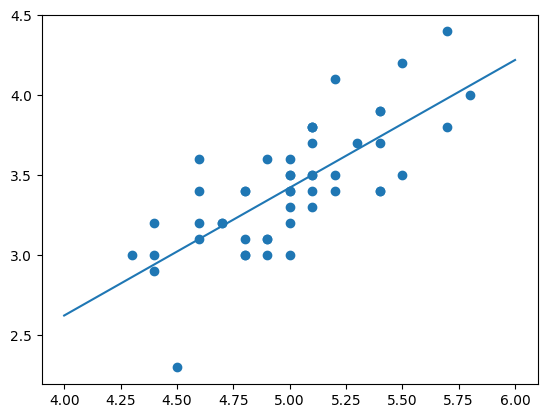

In [ ]:
plt.scatter(x, y) #데이터 점이 표시된다
plt.plot(xfit, yfit) #선이 표시된다. 이 선은 기본값이 '-'이다. 세번째 인자에 '.'으로 변경 가능. regression 은 관통선, 즉 b값 절편값 (intercept)을 정하는 것이다

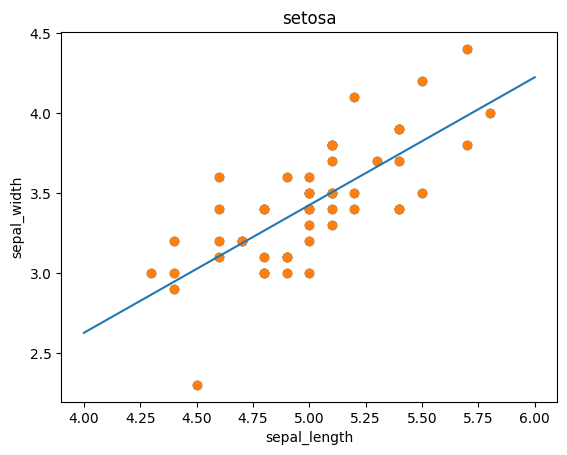

In [ ]:
#All relevant codelines for 'Setosa' in one script for a reference

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
x = list(df['sepal_length'])
y = list(df['sepal_width'])

df_setosa = df[df['species']=='setosa']
#Step 1. df['species']=='setosa': It selects <the rows> in the DataFrame df where <the value in the 'species' column is equal to 'setosa'>.
#Step 2. df[df['species']=='setosa']: This expression uses the previous Step #1 to filter the DataFrame df to create a new DataFrame df_setosa,
# containing only the rows where the value in the 'species' column is 'setosa'.

x = list(df_setosa['sepal_length'])
y = list(df_setosa['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('setosa')
!pip install Scikit-learn # Machine learning library

# LinearRegression is a class, used for linear regression modeling in scikit-learn, within the sklearn.
# linear_model module, which is part of the sklearn package.
# Note that the sklearn is a shorthand alias for "scikit-learn" library.

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
import numpy as np # The numpy package for numerical computing (large, multi-dimensional arrays and matrices, along with a collection of mathematical functions)
x = np.array(x) # The np.array() function converts the variable x into a NumPy array. If x was originally a Python list, tuple, or any other iterable object, this function will create a new NumPy array containing the elements of x.
y = np.array(y)
X = x.reshape(-1, 1) #1-D array converted to 2-D array
X.shape
model.fit(X, y)
model.coef_ #y=ax + b (a 상수 coefficient;) 모델 핏을 한다는 것은. 데이터가 있을 때 절편값을 구하는 것 Y=ax + b 틀 자체를 모델이라고 한다.  핏을 누르면, 데이터를 틀에 관통시켜서 a와 b 변수값을 구해내는 것을 fit 이라고 한다.
model.intercept_ #y=ax + b (b 절편값 intercept)
xfit = np.linspace(4, 6) #1-D array를 4~6까지 50 개의 숫자로 만들어라 (a=시작수, b=끝수, default = 50
xfit
Xfit = xfit.reshape(-1, 1) # 1-D array converted to 2-D array
yfit = model.predict(Xfit)
plt.scatter(x, y) #데이터 점이 표시된다
plt.plot(xfit, yfit)

#**📎🔖: ✂️ 📌 ✏️Practice Makes Perfect.**
## <font color = 'brown'> **i) 🌸 Versicolor**
>
##<font color = 'green'> **ii) 🌺 Virginica**

⬇️ In computing, "64-bit precision" refers to the level of accuracy and range that can be represented by a numeric data type, particularly floating-point numbers. Here's what it means:

**Precision**: A 64-bit floating-point number, often denoted as float64 or double (in some programming languages), uses 64 bits (or 8 bytes) of memory to store a single numerical value. This provides high precision, meaning that it can represent a wide range of values with a high degree of accuracy.

**Range**: With 64 bits of precision, a floating-point number can represent a wide range of values, both very small and very large. It can handle numbers ranging from approximately
10**-308 to 10**308 (positive or negative), depending on the specific implementation.

**Accuracy**: The precision of a floating-point number determines the number of significant digits it can represent. With 64-bit precision, a floating-point number can typically represent approximately 15 to 17 significant decimal digits accurately.

**64-bits & 8 bytes**: In the context of numeric data types, "64-bit precision" and "8-byte precision" are often used interchangeably because they refer to the same concept

In summary, "64-bit precision" refers to the capability of a data type (such as float64 in Python's NumPy library) to represent numerical values with a high degree of precision, covering a wide range of values, from very small to very large, with a high level of accuracy.

In [ ]:
print(df_setosa.dtypes)
print('\n')

#dtype: object in Python includes such as strings, lists, etc.

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object




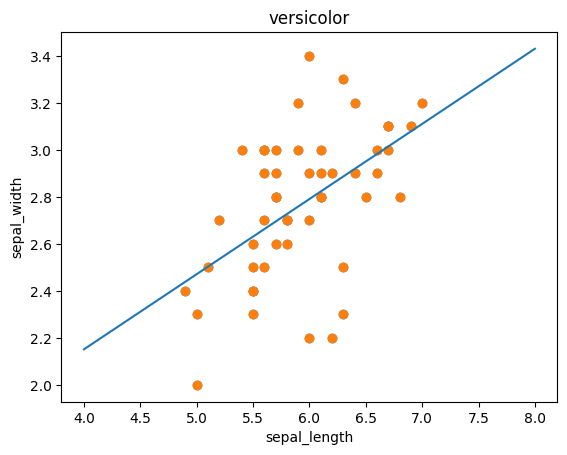

In [ ]:
#@markdown ##🌸 <font color = 'brown'> **Students' practice for writing a script for Versicolor**

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset('iris')
x = list(df['sepal_length'])
y = list(df['sepal_width'])

df_versicolor = df[df['species']=='versicolor']

x = list(df_versicolor['sepal_length'])
y = list(df_versicolor['sepal_width'])
plt.scatter(x, y);# The symbol ; has no functional significance - it suppresses the output of the last line of code, preventing unnecessary output from being displayed
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('versicolor')

!pip install Scikit-learn # Machine learning library
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
import numpy as np
x = np.array(x)
y = np.array(y)
X = x.reshape(-1, 1) #1-D array converted to 2-D array
X.shape
model.fit(X, y)
model.coef_ #y=ax +b (a 기울기값 slope)
model.intercept_ #y=ax + b (b 절편값 intercept)
xfit = np.linspace(4, 8, 50) #1-D array를 4~6까지 50 개의 숫자로 만들어라 (a=시작수, b=끝수, default = 50
xfit
Xfit = xfit.reshape(-1, 1) # 1-D array converted to 2-D array
yfit = model.predict(Xfit)
plt.scatter(x, y) #데이터 점이 표시된다
plt.plot(xfit, yfit)

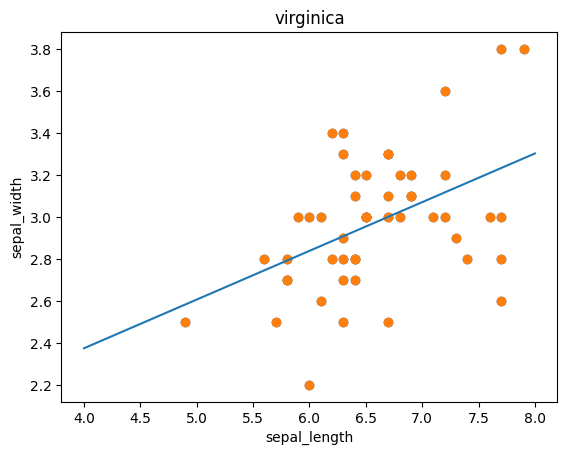

In [ ]:
#@markdown ##🌺 <font color = 'green'> **Students' practice for writing a script for Virginica**

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
x = list(df['sepal_length'])
y = list(df['sepal_width'])

df_virginica = df[df['species']=='virginica']

x = list(df_virginica['sepal_length'])
y = list(df_virginica['sepal_width'])
plt.scatter(x, y);
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('virginica')

!pip install Scikit-learn # Machine learning library
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
import numpy as np
x = np.array(x)
y = np.array(y)
X = x.reshape(-1, 1) #1-D array converted to 2-D array
X.shape
model.fit(X, y)
model.coef_ #y=ax + b (a 상수 coefficient;) 모델 핏을 한다는 것은. 데이터가 있을 때 절편값을 구하는 것 Y=ax + b 틀 자체를 모델이라고 한다.  핏을 누르면, 데이터를 틀에 관통시켜서 a와 b 변수값을 구해내는 것을 fit 이라고 한다.
model.intercept_ #y=ax + b (b 절편값 intercept)
xfit = np.linspace(4, 8) #1-D array를 4~6까지 50 개의 숫자로 만들어라 (a=시작수, b=끝수, default = 50
xfit
Xfit = xfit.reshape(-1, 1) # 1-D array converted to 2-D array
yfit = model.predict(Xfit)
plt.scatter(x, y) #데이터 점이 표시된다
plt.plot(xfit, yfit)

### ⬇️ **correlation은 절편값에 데이터가 얼마나 근접하게 나오는 지 계산한 값. 1.0에 근접할수록 선에 붙어나오는 것이고 0에 근접할수록 선에서 멀리 떨어져 나옴**

In [ ]:
numeric_columns = df_setosa.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Assuming you have already calculated the correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract the correlation coefficient between 'sepal_length' and 'sepal_width'
correlation_coefficient = correlation_matrix.loc['sepal_length', 'sepal_width']

print("Correlation coefficient between 'sepal_length' and 'sepal_width':", correlation_coefficient)

Correlation coefficient between 'sepal_length' and 'sepal_width': 0.45722781639411325


In [ ]:
numeric_columns = df_versicolor.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Assuming you have already calculated the correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract the correlation coefficient between 'sepal_length' and 'sepal_width'
correlation_coefficient = correlation_matrix.loc['sepal_length', 'sepal_width']

print("Correlation coefficient between 'sepal_length' and 'sepal_width':", correlation_coefficient)

Correlation coefficient between 'sepal_length' and 'sepal_width': 0.5259107172828247


In [ ]:
numeric_columns = df_virginica.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Assuming you have already calculated the correlation matrix
correlation_matrix = numeric_columns.corr()

# Extract the correlation coefficient between 'sepal_length' and 'sepal_width'
correlation_coefficient = correlation_matrix.loc['sepal_length', 'sepal_width']

print("Correlation coefficient between 'sepal_length' and 'sepal_width':", correlation_coefficient)

Correlation coefficient between 'sepal_length' and 'sepal_width': 0.45722781639411325
